c:\Users\Wolfrank\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Wolfrank\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


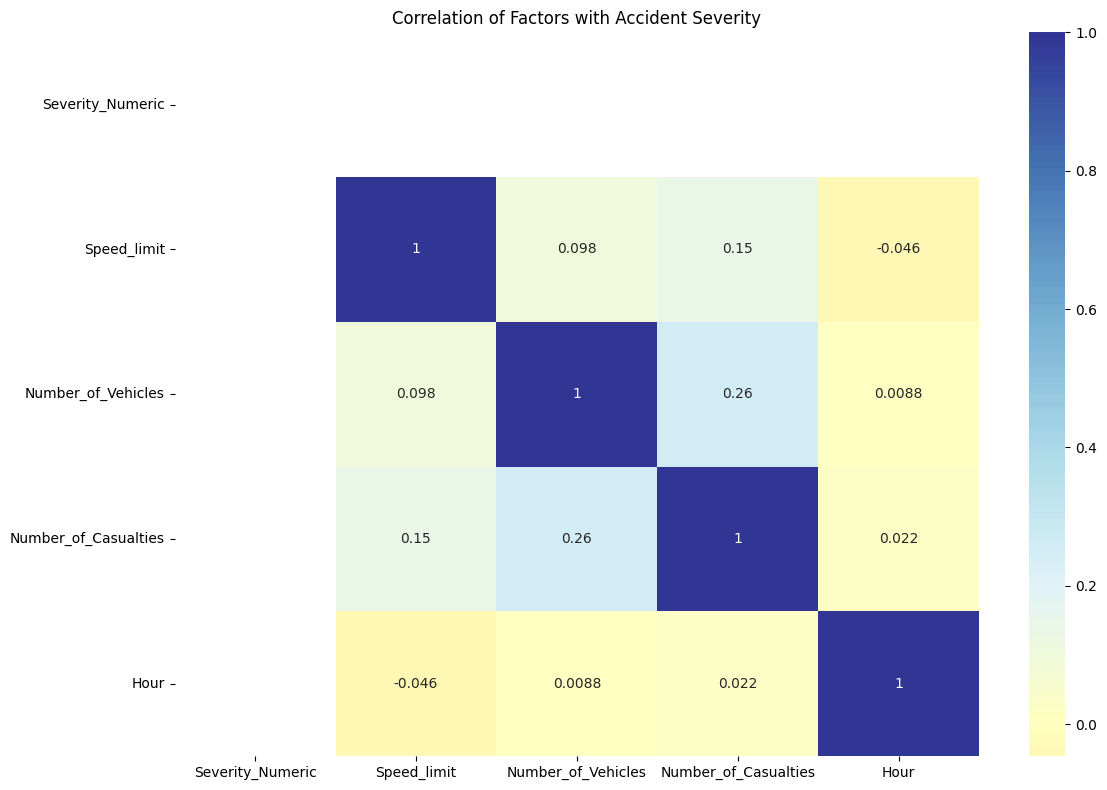

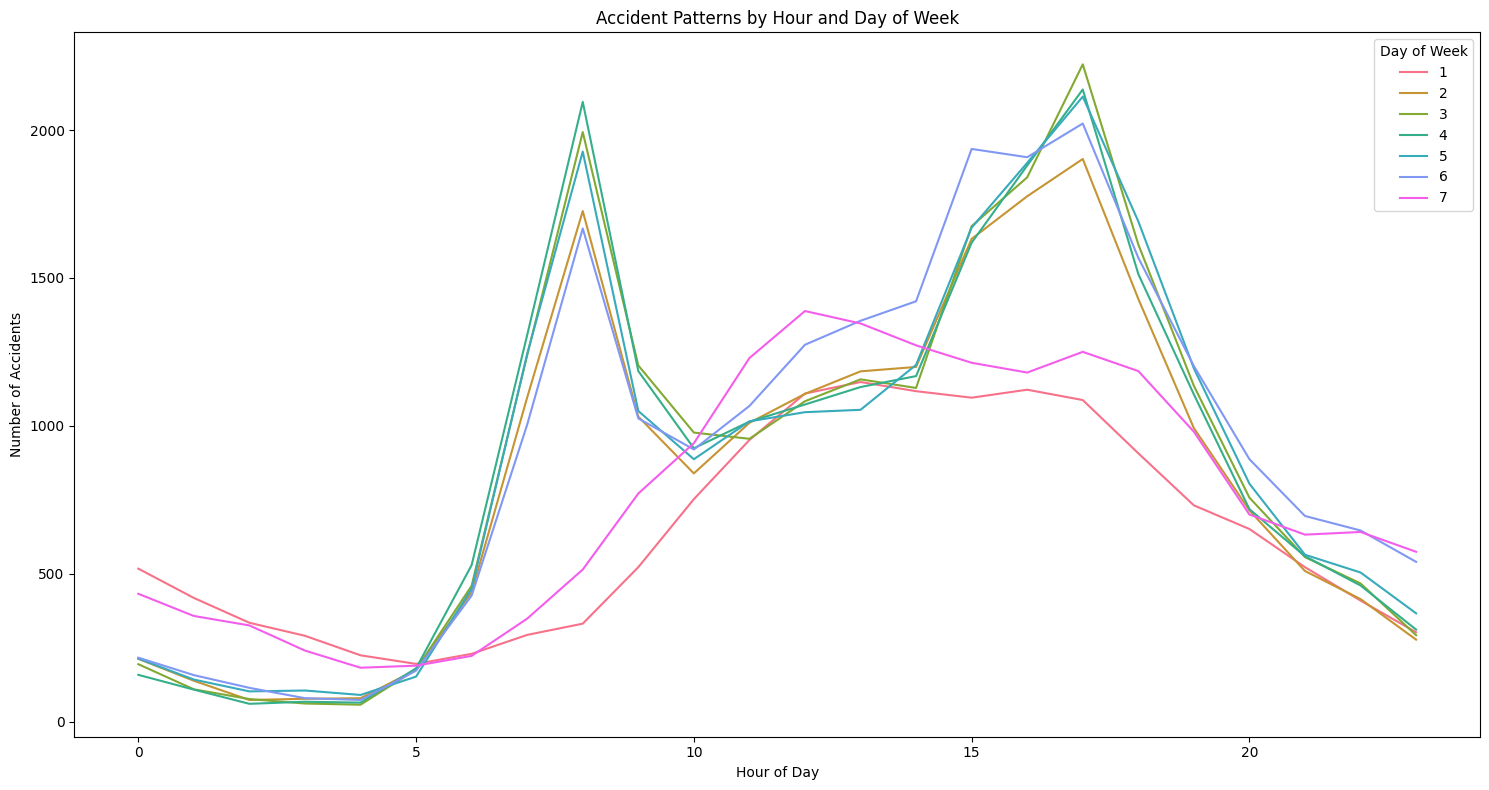

<Figure size 1200x600 with 0 Axes>

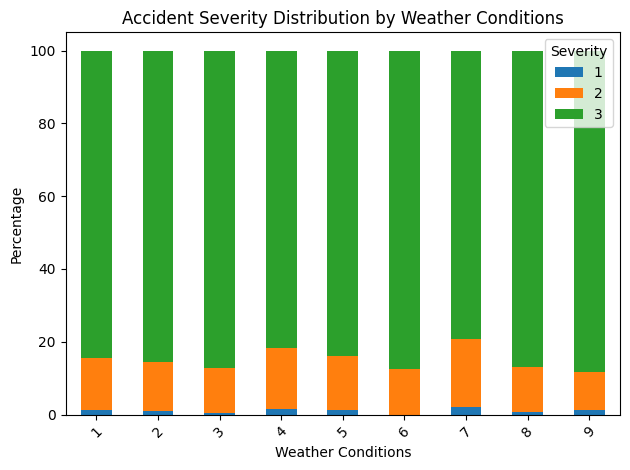

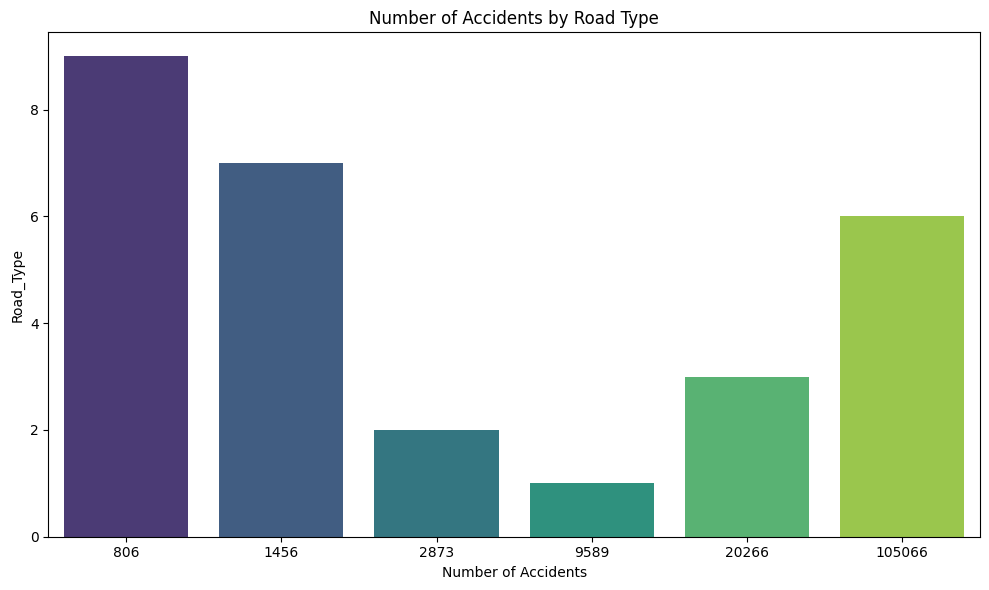

<Figure size 1200x600 with 0 Axes>

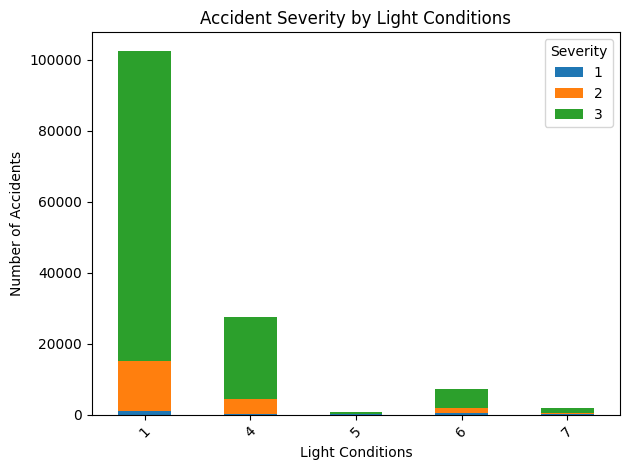

In [10]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Read the data with low_memory=False to avoid DtypeWarning
df = pd.read_csv('Data/RoadSafetyData_2015/Accidents_2015.csv', low_memory=False)

# Convert date using dayfirst=True for UK format (DD/MM/YYYY)
df['Date'] = pd.to_datetime(df['Date'], dayfirst=True)

# Convert time - first ensure it's in proper format
# Assuming time is in 24-hour format like "14:30"
df['Time'] = pd.to_datetime(df['Time'], format='%H:%M').dt.time

# Create hour column for temporal analysis
df['Hour'] = df['Time'].apply(lambda x: x.hour if x is not None else None)

# Now we can create our visualization functions
def analyze_severity_factors(df):
    plt.figure(figsize=(12, 8))
    
    # Convert categorical variables to numeric for correlation
    severity_mapping = {'Slight': 1, 'Serious': 2, 'Fatal': 3}
    df['Severity_Numeric'] = df['Accident_Severity'].map(severity_mapping)
    
    # Select numeric columns for correlation
    numeric_cols = ['Severity_Numeric', 'Speed_limit', 'Number_of_Vehicles', 
                   'Number_of_Casualties', 'Hour']
    
    severity_correlations = df[numeric_cols].corr()
    
    sns.heatmap(severity_correlations, 
                annot=True, 
                cmap='RdYlBu', 
                center=0)
    plt.title('Correlation of Factors with Accident Severity')
    plt.tight_layout()

def analyze_temporal_patterns(df):
    plt.figure(figsize=(15, 8))
    
    # Create hourly counts by day of week
    hourly_counts = df.groupby(['Day_of_Week', 'Hour'])['Accident_Index'].count().unstack()
    
    # Plot
    sns.lineplot(data=hourly_counts.T, 
                dashes=False,
                palette='husl')
    
    plt.title('Accident Patterns by Hour and Day of Week')
    plt.xlabel('Hour of Day')
    plt.ylabel('Number of Accidents')
    plt.legend(title='Day of Week')
    plt.tight_layout()

def analyze_weather_severity(df):
    plt.figure(figsize=(12, 6))
    
    # Create cross-tabulation of weather conditions and severity
    weather_severity = pd.crosstab(df['Weather_Conditions'], 
                                 df['Accident_Severity'], 
                                 normalize='index') * 100
    
    # Plot
    weather_severity.plot(kind='bar', stacked=True)
    plt.title('Accident Severity Distribution by Weather Conditions')
    plt.xlabel('Weather Conditions')
    plt.ylabel('Percentage')
    plt.xticks(rotation=45)
    plt.legend(title='Severity')
    plt.tight_layout()

def analyze_road_type_accidents(df):
    plt.figure(figsize=(10, 6))
    
    # Count accidents by road type
    road_counts = df['Road_Type'].value_counts()
    
    # Create bar plot
    sns.barplot(x=road_counts.values, 
                y=road_counts.index, 
                palette='viridis')
    
    plt.title('Number of Accidents by Road Type')
    plt.xlabel('Number of Accidents')
    plt.tight_layout()

def analyze_severity_by_light(df):
    plt.figure(figsize=(12, 6))
    
    # Create cross-tabulation of light conditions and severity
    light_severity = pd.crosstab(df['Light_Conditions'], 
                                df['Accident_Severity'])
    
    # Plot
    light_severity.plot(kind='bar', stacked=True)
    plt.title('Accident Severity by Light Conditions')
    plt.xlabel('Light Conditions')
    plt.ylabel('Number of Accidents')
    plt.xticks(rotation=45)
    plt.legend(title='Severity')
    plt.tight_layout()

# Run all analyses
analyze_severity_factors(df)
analyze_temporal_patterns(df)
analyze_weather_severity(df)
analyze_road_type_accidents(df)
analyze_severity_by_light(df)

plt.show()